The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


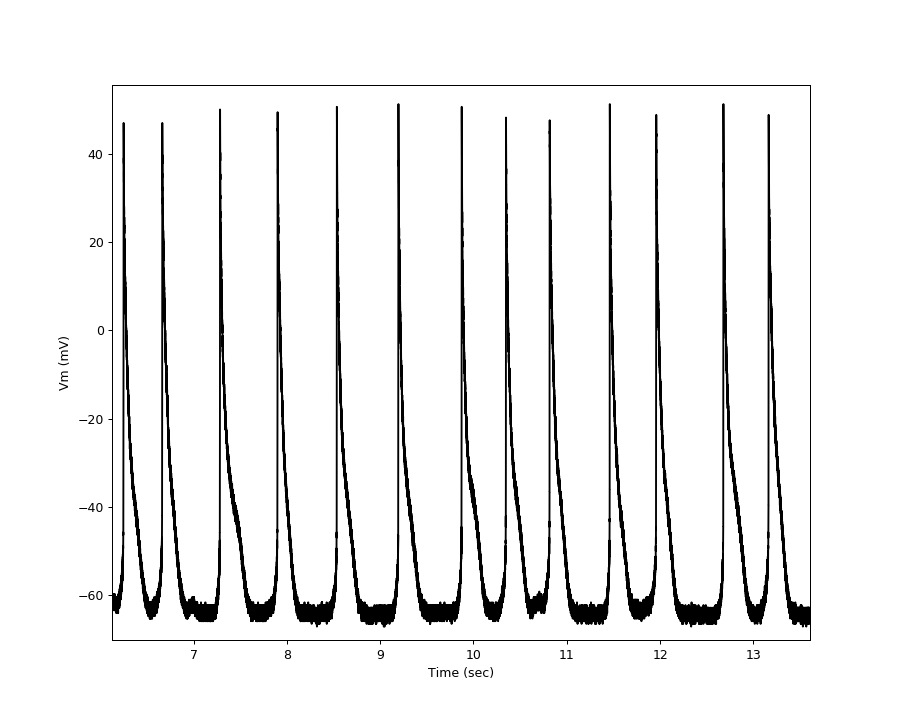

saving: ../data/19114001_b-3_00_e63_00.pdf
saving: ../data/19114001_b6_13_e13_61.pdf


In [9]:
path = '../data'

#
# Import required packages

%matplotlib notebook

import sys, os, time
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, HBox, VBox

import scipy.signal

# need this to update matplotlib plots in jupyter notebook
plt.ion()

# These two lines will auto reload imports, in particular bAnalysis
%load_ext autoreload
%autoreload 2

# needed to import from SanPy which is one folder up
sys.path.append("..")

from SanPy import bAnalysis
from SanPy import bAnalysisPlot

#
# global bAnalysis object, used throughout this notebook
ba = None 
gSelectedFile = ''
gShowAxis = False

#
# get .abf files
files = []
for file in os.listdir(path):
    if file.startswith('.'):
        continue
    if file.endswith('.abf'):
        files.append(file)

#
# file list widget
def fileList_callback(b):
    """Respond to clicks in file list"""
    newValue = b['new']
    
    global gSelectedFile
    gSelectedFile = newValue
    
    # todo: add bPlot.plotRaw()
    # get rid of call to .getDerivative()
    
    file = os.path.join(path, newValue)
    global ba
    ba = bAnalysis.bAnalysis(file)
    ba.getDerivative()
    
    
    #clear_output()
    myAxis.clear()
    bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)
    # this works
    #bAnalysisPlot.bPlot.plotDeriv(ba, fig=fig)
    global sweeps
    sweepList.options = ba.sweepList

    #
    showAxis(gShowAxis)

fileList = widgets.Select(
    options=files,
    # rows=10,
    description='fileList',
    disabled=False
)

#
# sweep list widget
def sweepList_callback(b):
    """Respond to clicks in sweeps list"""
    newValue = b['new']
    global ba
    ba.setSweep(newValue)
    #clear_output()
    myAxis.clear()
    bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)
    showAxis(gShowAxis)

sweeps = []
sweepList = widgets.Select(
    options=sweeps,
    description='sweeps',
    disabled=False
)

#
# save button widget
def saveButton_callback(b):
    """Save a pdf"""
    [xMin, xMax] = myAxis.get_xlim()
    xMin = '%.2f'%(xMin)
    xMax = '%.2f'%(xMax)
    
    lhs, rhs = xMin.split('.')
    xMin = 'b' + lhs + '_' + rhs
    
    lhs, rhs = xMax.split('.')
    xMax = 'e' + lhs + '_' + rhs
    
    filename, file_extension = os.path.splitext(gSelectedFile)
    saveFileName = filename + '_' + xMin + '_' + xMax + '.pdf'
    saveFilePath = os.path.join(path,saveFileName)
    print('saving:', saveFilePath)
    fig.savefig(saveFilePath)
    
saveButton = widgets.Button(
    description='Save pdf',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Save Vm as pdf'
)
saveButton.on_click(saveButton_callback)

#
# show axis checkbox widget
def showAxis(on):
    """Toggle axis on/off"""
    if on:
        fig.patch.set_visible(True)
        myAxis.axis('on')
    else:
        fig.patch.set_visible(False)
        myAxis.axis('off')

def toggleAxis_callback(b):
    """Respond to click axis checkbox"""
    newValue = b['new']
    # newValue is updated multiple times per click of checkbox
    # newValue values are: {}, then boolean, then {} again ????
    # here we just check if newValue is an int (same as bool)
    if isinstance(newValue, (int)):
        global gShowAxis
        gShowAxis = newValue
        showAxis(gShowAxis)
    else:
        pass
    
toggleAxis = widgets.Checkbox(
    value=False,
    description='Show Axis',
    disabled=False
)
toggleAxis.observe(toggleAxis_callback)

sweepList.observe(sweepList_callback, names='value')
fileList.observe(fileList_callback, names='value')

fig = plt.figure(figsize=(10, 8))
myAxis = fig.add_subplot(1, 1 , 1)

#
showAxis(gShowAxis)

vBox_buttons = VBox(children=[saveButton, toggleAxis])

HBox(children=[fileList, sweepList, vBox_buttons])
